In [1]:
from scipy import *
import numpy as np
import WLanalysis
from matplotlib import pyplot

In [17]:
z_arr = arange(0.5,3,0.5)
eb_dir = 'stats_avg/output_eb_5000_s4/'

###### power spectrum
psI = array( [load(eb_dir+'ALL_igalXigal_z{0}_z{0}_10k.npy'.format(iz)) for iz in z_arr])
psN = array( [load(eb_dir+'ALL_galXgal_z{0}_z{0}_10k.npy'.format(iz)) for iz in z_arr])

psI5ka = array( [load(eb_dir+'ALL_igalXigal_z{0}_z{0}_5ka.npy'.format(iz)) for iz in z_arr])
psN5ka = array( [load(eb_dir+'ALL_galXgal_z{0}_z{0}_5ka.npy'.format(iz)) for iz in z_arr])

##### 1d PDF
pdf1dI = array([load(eb_dir+'ALL_igal_pdf_z{0}_sg1.0_10k.npy'.format(iz)) for iz in z_arr])
pdf1dN = array( [load(eb_dir+'ALL_gal_pdf_z{0}_sg1.0_10k.npy'.format(iz)) for iz in z_arr])

pdf1dI5ka = array( [load(eb_dir+'ALL_igal_pdf_z{0}_sg1.0_5ka.npy'.format(iz)) for iz in z_arr])
pdf1dN5ka = array( [load(eb_dir+'ALL_gal_pdf_z{0}_sg1.0_5ka.npy'.format(iz)) for iz in z_arr])

#### 2d PDF
pdf2dI = array( [load(eb_dir+'ALL_igalXigal_2dpdf_z{0}_z{1}_sg1.0_10k.npy'.format(z_arr[i],z_arr[j])) 
                 for i in range(5) for j in range(i,5)])
pdf2dN = array( [load(eb_dir+'ALL_galXgal_2dpdf_z{0}_z{1}_sg1.0_10k.npy'.format(z_arr[i],z_arr[j])) 
                 for i in range(5) for j in range(i,5)])

pdf2dI5ka = array( [load(eb_dir+'ALL_igalXigal_2dpdf_z{0}_z{1}_sg1.0_5ka.npy'.format(z_arr[i],z_arr[j])) 
                 for i in range(5) for j in range(i,5)])
pdf2dN5ka = array( [load(eb_dir+'ALL_galXgal_2dpdf_z{0}_z{1}_sg1.0_5ka.npy'.format(z_arr[i],z_arr[j])) 
                 for i in range(5) for j in range(i,5)])

In [18]:
print psI.shape, pdf1dI.shape, pdf2dI.shape

(5, 101, 20) (5, 101, 40) (15, 101, 40, 40)


In [23]:
ell = WLanalysis.edge2center(linspace(100,5000,21))
kcenter_gal = WLanalysis.edge2center(linspace(-3,5,41))
kcenter_cmb = WLanalysis.edge2center(linspace(-3,3,31))

ngal_arr = np.array([8.83, 13.25, 11.15, 7.36, 4.26])
Clnn =  array([0.3**2 / ngal / 1.18e7 for ngal in ngal_arr])

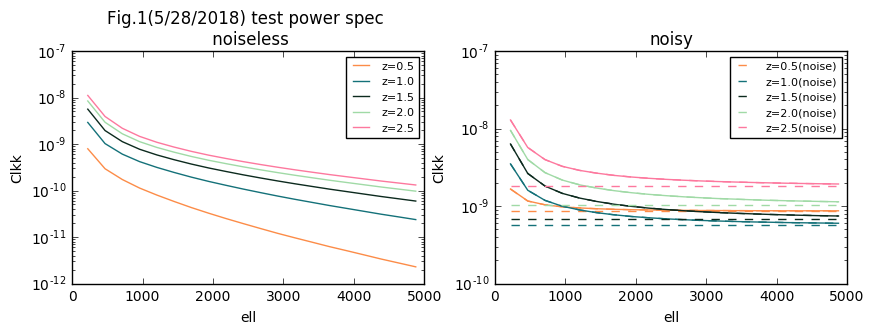

In [36]:
seed(45)
f, axes = subplots (1, 2, figsize=(10,3))
for i in range(5):
    icolor=rand(3)
    axes[0].plot(ell, psI[i,1],color=icolor,label='z=%s'%(z_arr[i]))
    axes[1].plot(ell, psN[i,1],color=icolor)#,label='z=%s'%(z_arr[i]))
    axes[1].plot(ell, ones(20)*Clnn[i],'--',color=icolor,label='z=%s(noise)'%(z_arr[i]))
    axes[1].plot(ell, psI[i,1]+Clnn[i],'--',color=icolor)
axes[0].set_title('Fig.1(5/28/2018) test power spec \n noiseless')
axes[1].set_title('noisy')
for ax in axes:
    ax.set_yscale('log')
    ax.set_xlabel('ell')
    ax.set_ylabel('Clkk')
    ax.legend(fontsize=8,loc='best')
show()